# MAIN FILE : run everything, concat, and save unified geojson
#could add concat and save of half-way files

In [2]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from gis_functions import *

In [ ]:
%run -i "tirol_workflow.py"

In [ ]:
%run -i "sbg_workflow.py"

In [ ]:
%run -i "oebo_workflow.py"

In [ ]:
%run -i "noe_workflow.py"

In [ ]:
%run -i "karn_workflow.py"

In [ ]:
%run -i "steyr_workflow.py"

In [ ]:
steyr=geopandas.read_file('final/steyr.geojson')
karn=geopandas.read_file('final/karn.geojson')
tirol=geopandas.read_file('final/tirol.geojson')
oebo=geopandas.read_file('final/oebo.geojson')
sbg=geopandas.read_file('final/sbg.geojson')
noe=geopandas.read_file('final/noe.geojson')


In [ ]:
files=[steyr,noe,oebo,tirol,sbg,karn]

In [203]:
cols=['BL','KG','GKZ','before_reg', 'freq',
       'mean_year', 'no_nitri', 'sum_PE','PE_nonitri','%PE_nonitri', '%before_reg', '%no_nitri' ,'geometry']
# 'KG_NR','PG'

In [205]:
steyr=steyr.loc[:,cols]
karn=karn.loc[:,cols]
tirol=tirol.loc[:,cols]
oebo=oebo.loc[:,cols]
sbg=sbg.loc[:,cols]
noe=noe.loc[:,cols]
files=[steyr,karn, tirol,sbg,noe,oebo] 

In [204]:
for file in files:
    print(file.columns)

Index(['id', '%PE_nonitri', '%before_reg', '%no_nitri', 'BKZ', 'BL', 'BL_KZ',
       'FA', 'FA_NR', 'FL', 'GB', 'GB_KZ', 'GKZ', 'KG', 'KG_NR', 'MERIDIAN',
       'PB', 'PE_nonitri', 'PG', 'ST', 'ST_KZ', 'VA', 'VA_NR', 'before_reg',
       'freq', 'mean_year', 'no_nitri', 'sum_PE', 'geometry'],
      dtype='object')
Index(['id', '%PE_nonitri', '%before_reg', '%no_nitri', 'BKZ', 'BL', 'BL_KZ',
       'FA', 'FA_NR', 'FL', 'GB', 'GB_KZ', 'GKZ', 'KG', 'KG_NR', 'MERIDIAN',
       'PB', 'PE_nonitri', 'PG', 'ST', 'ST_KZ', 'VA', 'VA_NR', 'before_reg',
       'freq', 'mean_year', 'no_nitri', 'sum_PE', 'geometry'],
      dtype='object')
Index(['id', '%PE_nonitri', '%before_reg', '%nitri', '%no_nitri', 'BKZ', 'BL',
       'C-ENTFERNUNG', 'FL', 'GKZ', 'KG', 'KG_NR', 'N-ENTFERNUNG',
       'NITRIFIZIERUNG', 'P-ENTFERNUNG', 'PE_nonitri', 'REINIGUNG MECHANISCH',
       'before_reg', 'freq', 'mean_year', 'no_nitri', 'sum_PE', 'sum_TM(t)',
       'geometry'],
      dtype='object')
Index(['id', '%PE_noni

# go on from here

In [206]:
data=pd.concat(files)

<AxesSubplot:>

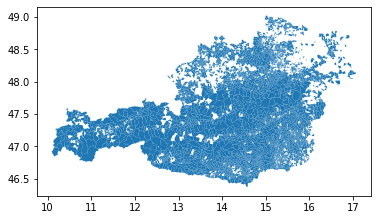

In [207]:
data.plot()


In [ ]:
with open('final/complete.geojson', 'w') as f:
    f.write(data.to_json())
